In [6]:
import sys
import os

# Добавляем путь к корню проекта
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from data_loader import DataProcessor
from data_visualizer import DataVisualizer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

Данные успешно загружены из csv!


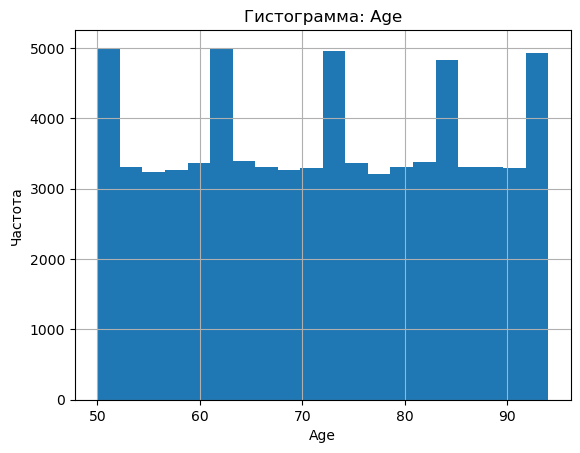

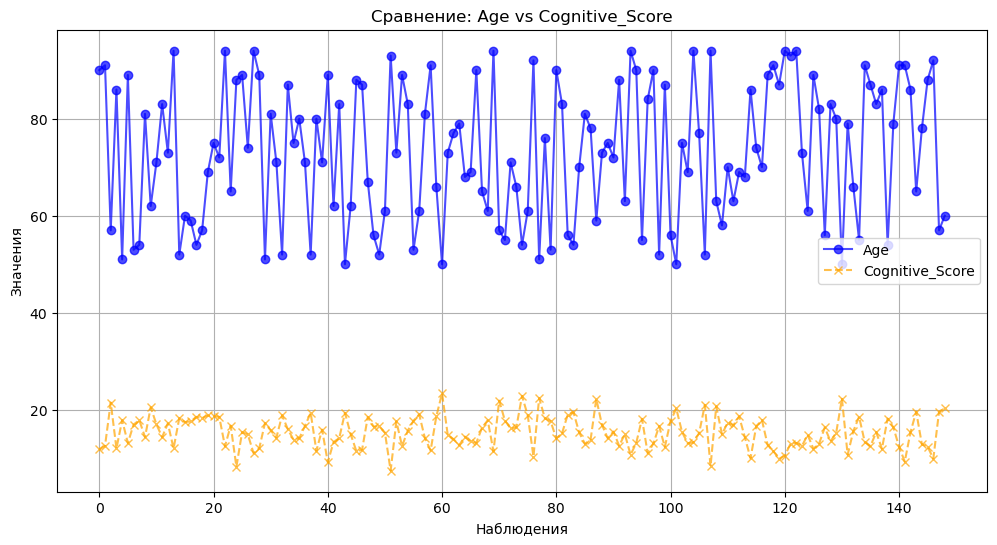

<Figure size 1200x800 with 0 Axes>

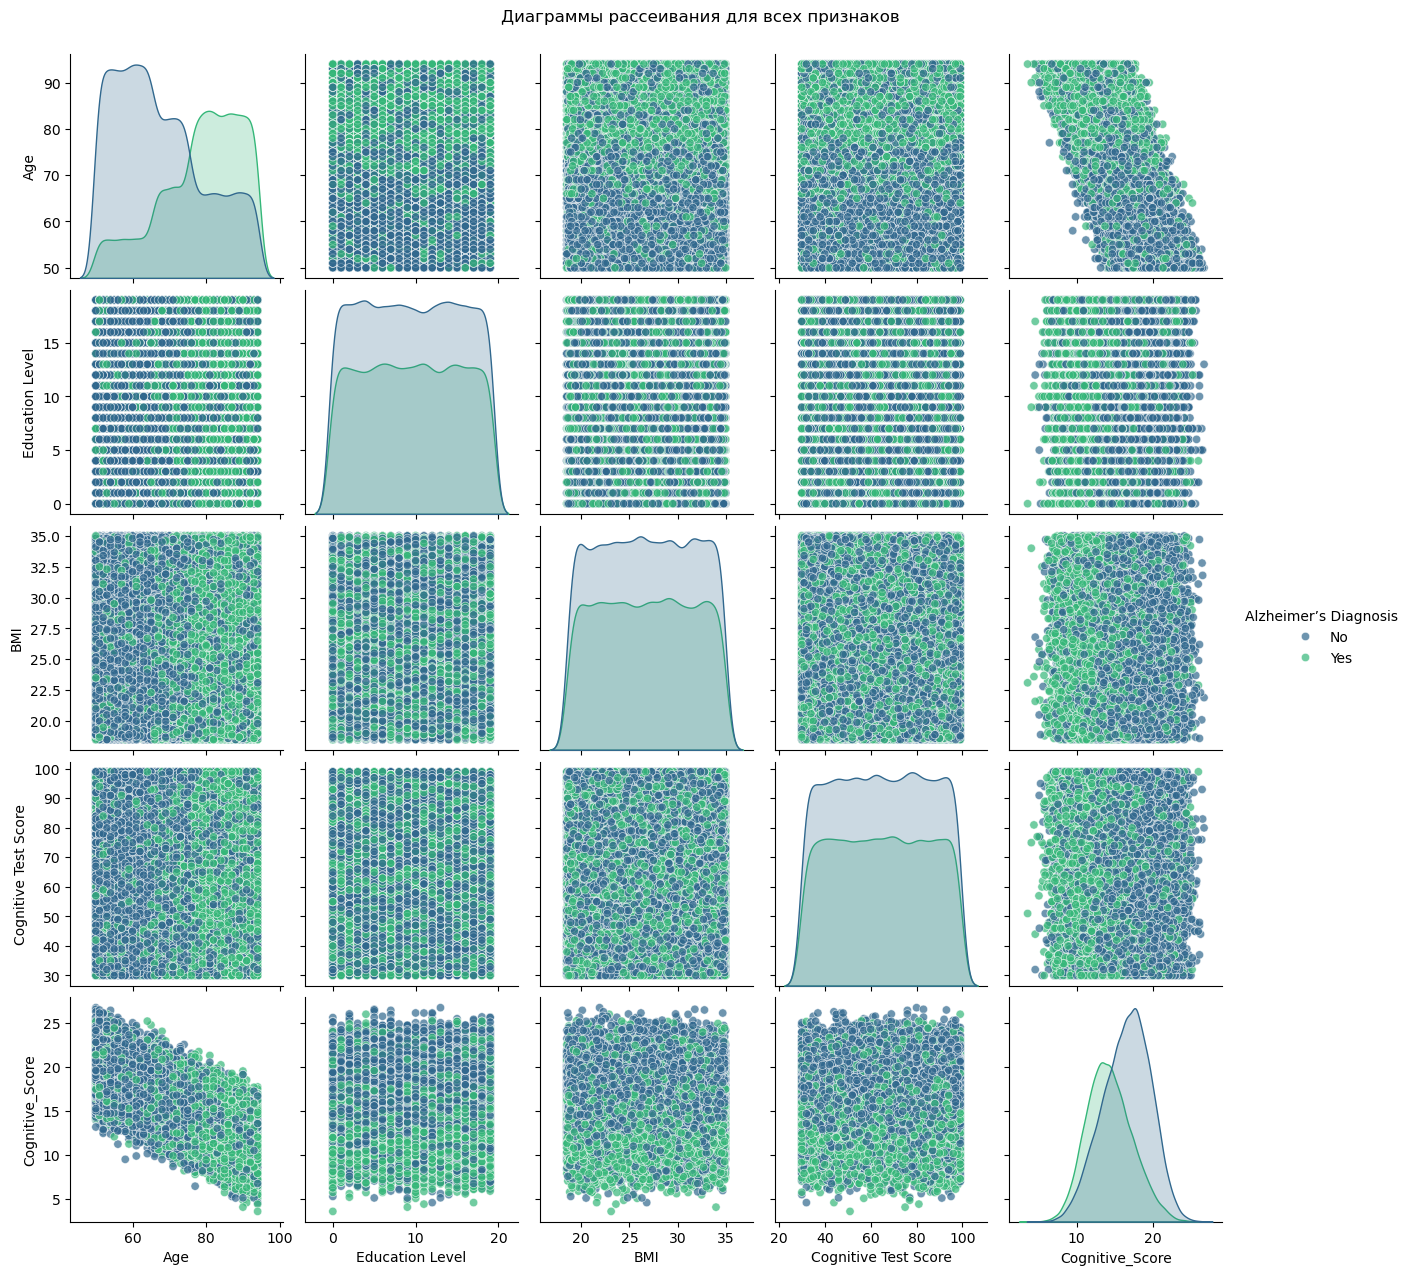

In [8]:
processor = DataProcessor()
processor.load_csv('../data/alzheimers_prediction_dataset.csv')
processor.data['Cognitive_Score'] = 30 - (processor.data['Age'] / 5) + np.random.normal(0, 2, size=len(processor.data))

visualizer = DataVisualizer(processor.data)
visualizer.plot_histogram('Age')
visualizer.plot_line('Age', 'Cognitive_Score')
visualizer.plot_scatter('Alzheimer’s Diagnosis')

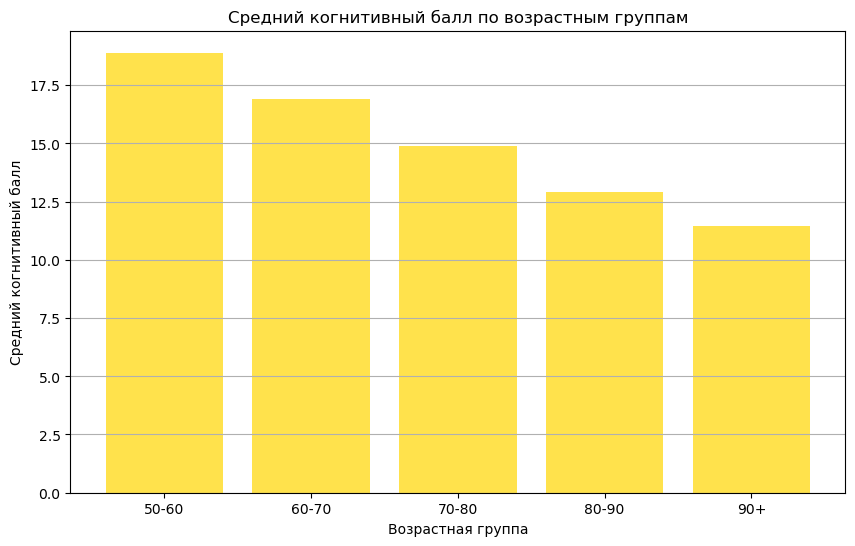

In [9]:
processor.data['Age_Group'] = pd.cut(processor.data['Age'], bins=[50, 60, 70, 80, 90, 100], labels=['50-60', '60-70', '70-80', '80-90', '90+'])

# Группируем данные и усредняем когнитивные баллы
grouped = processor.data.groupby('Age_Group', observed=True)['Cognitive_Score'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(grouped['Age_Group'], grouped['Cognitive_Score'], color='gold', alpha=0.7)
plt.xlabel('Возрастная группа')
plt.ylabel('Средний когнитивный балл')
plt.title('Средний когнитивный балл по возрастным группам')
plt.grid(axis='y')
plt.show()

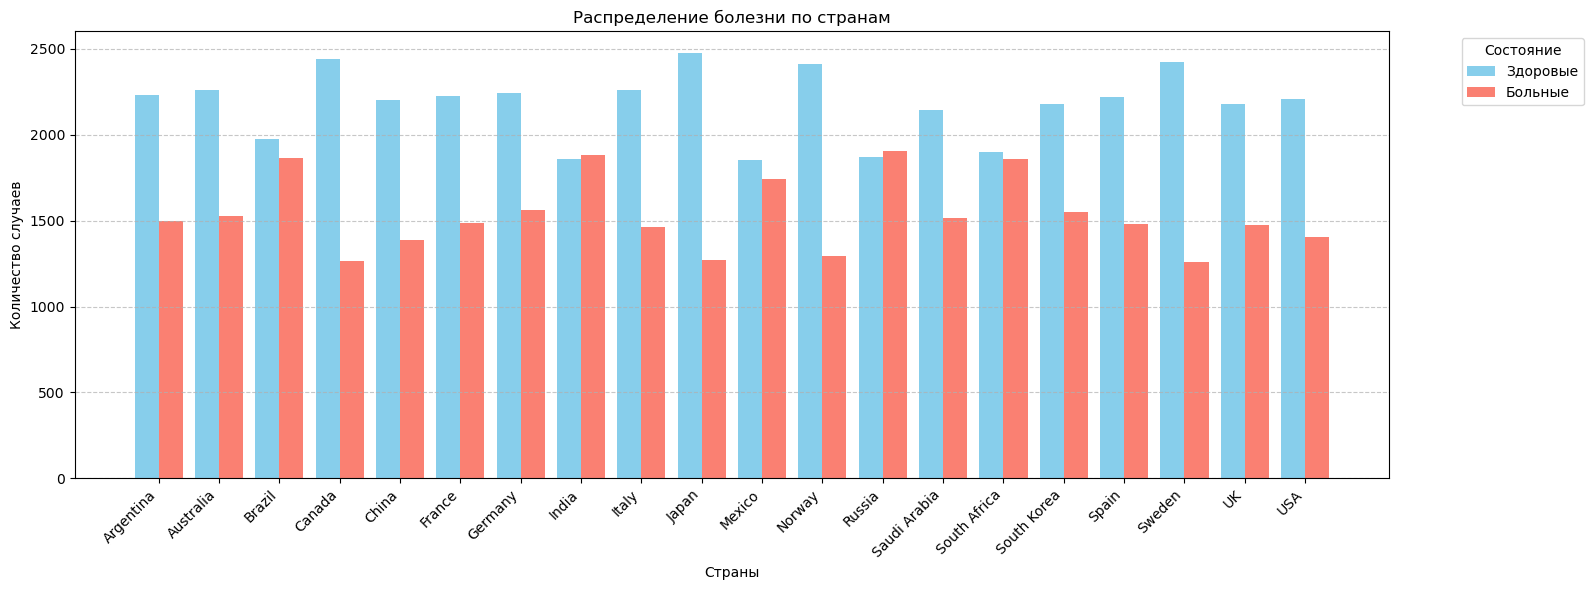

In [10]:
# Группировка данных по странам и диагнозу
country_counts = processor.data.groupby(["Country", "Alzheimer’s Diagnosis"]).size().reset_index(name="Count")

# Разделение данных для здоровых и больных
healthy_counts = country_counts[country_counts["Alzheimer’s Diagnosis"] == "No"]
sick_counts = country_counts[country_counts["Alzheimer’s Diagnosis"] == "Yes"]

# Объединение здоровых и больных в одну таблицу
countries = country_counts["Country"].unique()
healthy_counts = healthy_counts.set_index("Country")["Count"].reindex(countries, fill_value=0)
sick_counts = sick_counts.set_index("Country")["Count"].reindex(countries, fill_value=0)

# Позиции столбцов
x = range(len(countries))
bar_width = 0.4

def plot_country_diagnos(countries, healthy_counts, sick_counts):
    plt.figure(figsize=(16, 6))
    plt.bar([p - bar_width / 2 for p in x], healthy_counts, bar_width, label="Здоровые", color="skyblue")
    plt.bar([p + bar_width / 2 for p in x], sick_counts, bar_width, label="Больные", color="salmon")
    plt.xlabel("Страны")
    plt.ylabel("Количество случаев")
    plt.title("Распределение болезни по странам")
    plt.xticks(x, countries, rotation=45, ha="right")
    plt.legend(title="Состояние", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
    
if processor.data is not None:
    plot_country_diagnos(countries, healthy_counts, sick_counts)
else:
    print('Данные не загружены')